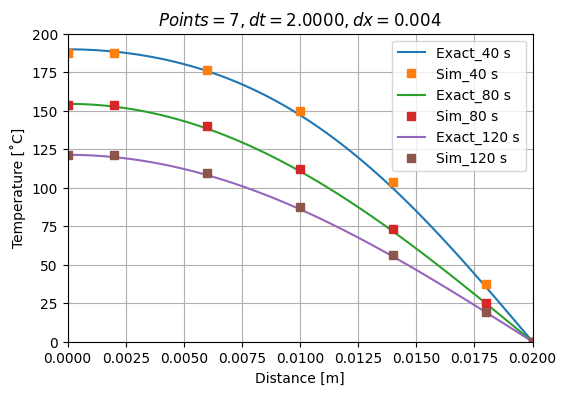

In [178]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import spdiags

L = 0.02 # m
k = 10 # W/m K
pc = 1e7 # J/m^3 K
nx = 5
dx = 0.004
x = np.r_[0,np.linspace(dx/2,L-dx/2,nx),L]
t = np.r_[40,80,120]
x2 = np.linspace(0,L,100)

def Exact_8_1(x, t, repeat = 100):
    alpha = k/pc
    sum_value = 0
    for i in range(1,repeat):
        lambda_n = (2*i-1)*np.pi/2/L
        sum_value += (-1)**(i+1)/(2*i-1)*np.exp(-alpha*lambda_n**2*t)*np.cos(lambda_n*x)
    return 4/np.pi*sum_value*200


nx = 5
dx = 0.004
dt = 2
T = np.zeros((len(t),len(x)))
TB = 0
aP0 = pc*dx/dt

def aW(n):
    if n == 1: return 0
    else: return -k/dx

def aE(n):
    if n == 5: return 0
    else: return -k/dx

def Sp(n):
    if n == 5: return 2*k/dx
    else: return 0

def aP(n):
    return -aW(n) -aE(n) + aP0 + Sp(n)

def Su(n):
    if n == 5: return 2*k/dx*(TB)
    else: return 0

initial = 200
nt = 61
T = np.zeros(7).copy()

for i in range(nt):
    T = np.c_[T,np.zeros(7)]
    
T = T.T
T[0,:] = initial
a, b, c = list(map(aW, range(1,nx+1))),list(map(aP, range(1,nx+1))), list(map(aE, range(1,nx+1)))
diags = np.r_[a[1:],0,0], np.r_[b,0], np.r_[0,c]
A = spdiags(diags, [-1,0,1], nx, nx).toarray()

for r in range(1,len(T)):
    b = T[r-1,1:-1]
    b = b*aP0
    T[r,1:-1] = np.linalg.solve(A, b)
    T[r,0], T[r,-1] = T[r,1], 0

plt.figure(figsize=(6,4))
for i in range(len(t)):
    plt.plot(x2,Exact_8_1(x2,t[i]), label="Exact_%d s" %t[i])
    plt.plot(x,T[int(t[i]/dt)], 's', label="Sim_%d s" %t[i])
plt.title('$Points=%d,dt=%1.4f,dx=%1.3f$'%(len(x),dt,dx))
plt.xlabel('Distance [m]')
plt.ylabel('Temperature [˚C]')
plt.xlim([min(x), max(x)])
plt.ylim([0, 200])
plt.legend()
plt.grid()

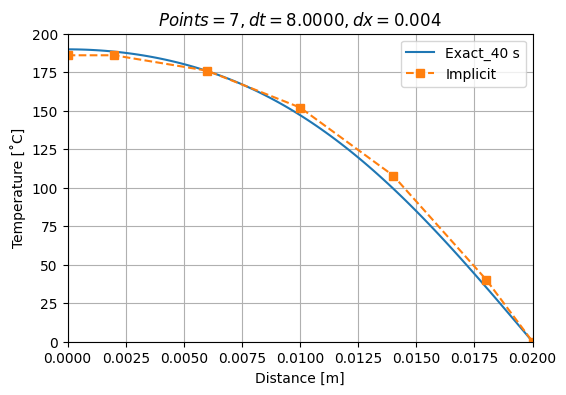

In [177]:
dx = 0.004
dt = 8
T = np.zeros((len(t),len(x)))
aP0 = pc*dx/dt

def aP(n):
    return -aW(n) -aE(n) + aP0 + Sp(n)

nt = 6
T = np.zeros(7).copy()

for i in range(nt):
    T = np.c_[T,np.zeros(7)]
    
T = T.T
T[0,:] = initial
a, b, c = list(map(aW, range(1,nx+1))),list(map(aP, range(1,nx+1))), list(map(aE, range(1,nx+1)))
diags = np.r_[a[1:],0,0], np.r_[b,0], np.r_[0,c]
A = spdiags(diags, [-1,0,1], nx, nx).toarray()

for r in range(1,len(T)):
    b = T[r-1,1:-1]
    b = b*aP0
    T[r,1:-1] = np.linalg.solve(A, b)
    T[r,0], T[r,-1] = T[r,1], 0

    
Sol_im = T.copy()
plt.figure(figsize=(6,4))
plt.plot(x2,Exact_8_1(x2,t[0]), label="Exact_%d s" %t[0])
plt.plot(x,Sol_im[int(t[0]/dt)], '--s', label="Implicit")
plt.title('$Points=%d,dt=%1.4f,dx=%1.3f$'%(len(x),dt,dx))
plt.xlabel('Distance [m]')
plt.ylabel('Temperature [˚C]')
plt.xlim([min(x), max(x)])
plt.ylim([0, 200])
plt.legend()
plt.grid()